In [60]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [62]:
crypto_df = pd.read_csv(Path('Resources/crypto_data.csv'),index_col=0)


In [63]:
crypto_df


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [64]:
#Filter the data on the IsTrading column to count the False
crypto_df['IsTrading'].value_counts()


True     1144
False     108
Name: IsTrading, dtype: int64

In [65]:
#Create new DF with only crypto currencies that are trading (remove the False values from IsTrading column)
new_crypto_df=crypto_df[crypto_df['IsTrading'] == True]


In [66]:
#Show new DF
new_crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [67]:
#Check values before dropping columns
new_crypto_df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [68]:
# Drop the IsTrading column
new_df=new_crypto_df.drop(columns='IsTrading')

In [69]:
#Show the Is Null = True using Is Null (information purposes)
new_df.isnull()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,False,False,False,False,False
365,False,False,False,True,False
404,False,False,False,False,False
611,False,False,False,True,False
808,False,False,False,False,False
...,...,...,...,...,...
SERO,False,False,False,True,False
UOS,False,False,False,True,False
BDX,False,False,False,False,False
ZEN,False,False,False,False,False


In [70]:
#Drop row for any Is Null values 
clean_crypto_df=new_df.dropna()

In [71]:
#Show cleaned dataframe
clean_crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [72]:
#Create new DF for currencies that been mined
crypto_cur_df = clean_crypto_df.loc[clean_crypto_df['TotalCoinsMined'] > 0]
crypto_cur_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [73]:
#Drop Coin Name column
new_crypto=crypto_cur_df.drop(columns='CoinName')

In [74]:
#Show new df with CoinName column removed
new_crypto

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [75]:
#how many differnt values in Algorithm column
len(new_crypto['Algorithm'].value_counts())

71

In [76]:
#How many different values in ProofType column
len(new_crypto['ProofType'].value_counts())

25

In [77]:
#Run get dummies to change Algorithm and ProofType text to values
crypto_curr_df = pd.get_dummies(new_crypto, columns=['Algorithm','ProofType'])

In [78]:
#Show new data frame. 99 columns is correct
crypto_curr_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# define standard scaler
scaler = StandardScaler()
  
# transform data
scaled_crypto_df = scaler.fit_transform(new_crypto_data)
scaled_crypto_df


array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [112]:
#scaled_df = pd.DataFrame(scaled_crypto_df, columns=new_crypto_data.columns)
#scaled_df = pd.DataFrame(scaled_crypto_df)
#scaled_df.head()

In [113]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [114]:
# Initialize PCA model
pca = PCA(n_components=0.9)

# Run PCA on the data
pca_crypto= pca.fit_transform(scaled_crypto_df)

In [119]:
#Convert PCA back to data frame. Shows the number of columns reduced from 99 to 74 by PCA
#df_pca_crypto=pd.DataFrame(data=pca_crypto)
#df_pca_crypto

In [124]:
pca_crypto.shape

(532, 74)

In [125]:
pca.explained_variance_ratio_.sum()

0.9010870638268429

In [126]:
from sklearn.manifold import TSNE
# Run t-SNE
tsne = TSNE(learning_rate=35)
#scaled_features = scaler.fit_transform(df_pca_crypto)
tsne_features = tsne.fit_transform(pca_crypto)

In [127]:
tsne_features.shape

(532, 2)

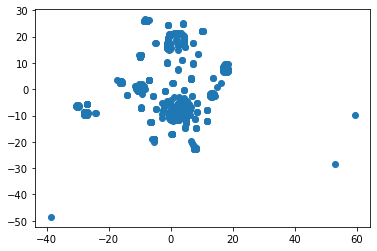

In [128]:
import matplotlib.pyplot as plt
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [129]:
#The t-SNE does show slight clustering of the data.

C:\Users\cconn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


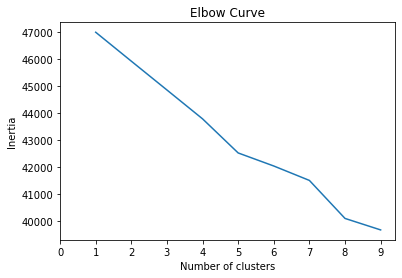

In [130]:
# Finding the best value for k
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_crypto)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(10)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
# From the plotting of the qualifying crypto currencies, it appears they cannot be clustered together.